In this project, we would like to predict the closing price of the Google company in the Stock Market based on the history of closing prices of this company.

# 1. Importing libraries

In [1]:
!pip install -q yfinance

In [2]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
from datetime import datetime as dt
from pandas_datareader.data import DataReader
import yfinance as yf


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 2. Preprocessing

In [3]:
# Choosing the company = Google, end and start dates
company = 'GOOG'
end = dt.now()
start = dt(end.year -2, end.month, end.day)

In [4]:
#downloading the dataset relative to Google
data = yf.download(company, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-13,1209.180054,1220.510010,1187.598022,1217.560059,1217.560059,1739800
2020-04-14,1245.089966,1282.069946,1236.930054,1269.229980,1269.229980,2470400
2020-04-15,1245.609985,1280.459961,1240.400024,1262.469971,1262.469971,1671700
2020-04-16,1274.099976,1279.000000,1242.619995,1263.469971,1263.469971,2518100
2020-04-17,1284.849976,1294.430054,1271.229980,1283.250000,1283.250000,1949000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 2020-04-13 to 2022-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       506 non-null    float64
 1   High       506 non-null    float64
 2   Low        506 non-null    float64
 3   Close      506 non-null    float64
 4   Adj Close  506 non-null    float64
 5   Volume     506 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.7 KB


In [7]:
data.shape

(506, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02
mean,2184.539351,2207.453615,2162.306863,2185.145248,2185.145248,1.474216e+06
std,570.339252,572.442411,565.131596,568.566613,568.566613,5.991371e+05
min,1209.180054,1220.510010,1187.598022,1216.339966,1216.339966,2.166330e+05
25%,1584.544983,1608.038727,1568.911255,1588.762451,1588.762451,1.071000e+06
50%,2263.054932,2280.997437,2251.452026,2263.704956,2263.704956,1.355900e+06
75%,2742.060547,2767.599976,2713.585022,2739.767578,2739.767578,1.702050e+06
max,3037.270020,3042.000000,2997.750000,3014.179932,3014.179932,4.487500e+06


In [9]:
#checking for null values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# 3. Data visualization

Text(0.5, 1.0, 'Closing Price of Google')

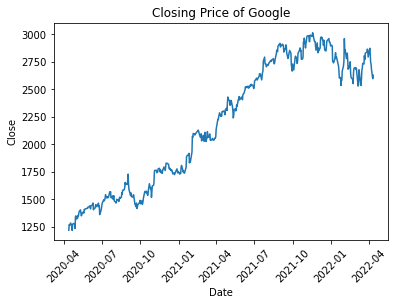

In [10]:
#plotting a historical view of the closing price
plt.plot(data['Close'])
plt.ylabel('Close')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Closing Price of Google")

# 4. Modeling

In [11]:
# Create a new dataframe with only the 'Close' column 
data1 = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data1.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .9 ))

training_data_len

456

In [12]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[6.78643704e-04],
       [2.94186444e-02],
       [2.56585713e-02],
       [2.62147943e-02],
       [3.72169022e-02],
       [2.79613428e-02],
       [0.00000000e+00],
       [2.60701709e-02],
       [3.33567469e-02],
       [3.50254160e-02],
       [3.31175412e-02],
       [9.63938863e-03],
       [6.96057586e-02],
       [7.35994698e-02],
       [5.79973866e-02],
       [6.14404425e-02],
       [7.49621891e-02],
       [7.28430147e-02],
       [8.68932139e-02],
       [9.56870648e-02],
       [1.03969234e-01],
       [8.86619652e-02],
       [7.39720958e-02],
       [7.77544396e-02],
       [8.72435693e-02],
       [9.32229669e-02],
       [8.74076795e-02],
       [1.05893744e-01],
       [1.03713393e-01],
       [1.07951810e-01],
       [1.11622868e-01],
       [1.12078941e-01],
       [1.11461542e-01],
       [1.18241936e-01],
       [1.19854928e-01],
       [1.23970992e-01],
       [1.22391338e-01],
       [1.08930768e-01],
       [1.23509352e-01],
       [1.28081489e-01],


In [13]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00067864, 0.02941864, 0.02565857, 0.02621479, 0.0372169 ,
       0.02796134, 0.        , 0.02607017, 0.03335675, 0.03502542,
       0.03311754, 0.00963939, 0.06960576, 0.07359947, 0.05799739,
       0.06144044, 0.07496219, 0.07284301, 0.08689321, 0.09568706,
       0.10396923, 0.08866197, 0.0739721 , 0.07775444, 0.08724357,
       0.09322297, 0.08740768, 0.10589374, 0.10371339, 0.10795181,
       0.11162287, 0.11207894, 0.11146154, 0.11824194, 0.11985493,
       0.12397099, 0.12239134, 0.10893077, 0.12350935, 0.12808149,
       0.13339345, 0.13878321, 0.10429182, 0.10948699, 0.11319696,
       0.12591777, 0.13059006, 0.1221577 , 0.11979932, 0.13100166,
       0.13798229, 0.11993838, 0.12514461, 0.07985141, 0.09935812,
       0.10972613, 0.12331469, 0.13814354, 0.15538646, 0.14953505])]
[0.15555335263229908]

[array([0.00067864, 0.02941864, 0.02565857, 0.02621479, 0.0372169 ,
       0.02796134, 0.        , 0.02607017, 0.03335675, 0.03502542,
       0.03311754, 0.00963939, 0.06

In [14]:
# Create the testing data set
# Create a new array containing scaled values from index 456 to 505 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [15]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=50)

2022-04-12 14:07:52.195044: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-12 14:07:52.823639: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
13/13 [==============================] - 5s 95ms/step - loss: 0.0841
Epoch 2/50
13/13 [==============================] - 1s 97ms/step - loss: 0.0104
Epoch 3/50
13/13 [==============================] - 1s 98ms/step - loss: 0.0035
Epoch 4/50
13/13 [==============================] - 1s 96ms/step - loss: 0.0023
Epoch 5/50
13/13 [==============================] - 1s 94ms/step - loss: 0.0016
Epoch 6/50
13/13 [==============================] - 1s 93ms/step - loss: 0.0016
Epoch 7/50
13/13 [==============================] - 1s 93ms/step - loss: 0.0015
Epoch 8/50
13/13 [==============================] - 1s 98ms/step - loss: 0.0014
Epoch 9/50
13/13 [==============================] - 1s 94ms/step - loss: 0.0014
Epoch 10/50
13/13 [==============================] - 1s 93ms/step - loss: 0.0014
Epoch 11/50
13/13 [==============================] - 1s 94ms/step - loss: 0.0014
Epoch 12/50
13/13 [==============================] - 1s 95ms/step - loss: 0.0015
Epoch 13/50
13/13 [==================

In [16]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

104.0414327387872

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


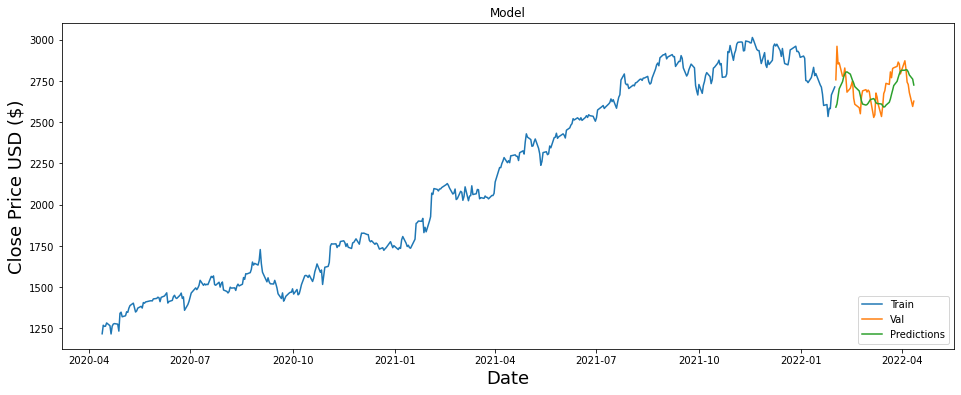

In [17]:
# Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()